In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn   
!pip install statsmodels


In [2]:
!pip install seaborn

In [2]:
import pandas as pd

In [4]:
carbondata = pd.read_csv('carbonmonitor-us_datas_2025-11-22.csv')
carbondata.head(5)

,state,date,sector,value,Unnamed: 4
0,Alabama,01/01/2019,Power,0.099171,NaN
1,Alabama,02/01/2019,Power,0.110479,NaN
2,Alabama,03/01/2019,Power,0.108182,NaN
3,Alabama,04/01/2019,Power,0.106806,NaN
4,Alabama,05/01/2019,Power,0.107864,NaN


In [5]:
#drop unnamed column
carbondata = carbondata.loc[:, ~carbondata.columns.str.contains('^Unnamed')]
carbondata.tail(5)

,state,date,sector,value
341947,United States,27/12/2021,International Aviation,0.175717
341948,United States,28/12/2021,International Aviation,0.175380
341949,United States,29/12/2021,International Aviation,0.178956
341950,United States,30/12/2021,International Aviation,0.175332
341951,United States,31/12/2021,International Aviation,0.175538


In [6]:
#rename column 'value' to 'emissions'
carbondata = carbondata.rename(columns={'value': 'emissions'})
carbondata.head(5)

,state,date,sector,emissions
0,Alabama,01/01/2019,Power,0.099171
1,Alabama,02/01/2019,Power,0.110479
2,Alabama,03/01/2019,Power,0.108182
3,Alabama,04/01/2019,Power,0.106806
4,Alabama,05/01/2019,Power,0.107864


In [7]:
#filter for California state only
california_df = carbondata[carbondata['state'] == "California"]
california_df.head(5)

,state,date,sector,emissions
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [ ]:
california_df.to_csv("california_emissions.csv", index=False)


,state,date,sector,emissions
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [8]:
california_df.head(5)

,state,date,sector,emissions
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [9]:
#change column name value to emissions
california_df = california_df.rename(columns={'value': 'emissions'})
california_df.head(5)

,state,date,sector,emissions
26304,California,01/01/2019,Power,0.074049
26305,California,02/01/2019,Power,0.084749
26306,California,03/01/2019,Power,0.086930
26307,California,04/01/2019,Power,0.084383
26308,California,05/01/2019,Power,0.088528


In [9]:
california_df.info()
california_df.head()
california_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6576 entries, 26304 to 32879
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      6576 non-null   object 
 1   date       6576 non-null   object 
 2   sector     6576 non-null   object 
 3   emissions  6576 non-null   float64
dtypes: float64(1), object(3)
memory usage: 256.9+ KB


,emissions
count,6576.000000
mean,0.150390
std,0.132277
min,0.011139
25%,0.055633
50%,0.096959
75%,0.180492
max,0.500525


In [10]:
#convert date column to datetime format
california_df['date'] = pd.to_datetime(california_df['date'], dayfirst=True, errors='coerce')

C:\Users\innov\AppData\Local\Temp\ipykernel_18260\118947764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_df['date'] = pd.to_datetime(california_df['date'], dayfirst=True, errors='coerce')


In [11]:
california_df.head(5)

,state,date,sector,emissions
26304,California,2019-01-01,Power,0.074049
26305,California,2019-01-02,Power,0.084749
26306,California,2019-01-03,Power,0.086930
26307,California,2019-01-04,Power,0.084383
26308,California,2019-01-05,Power,0.088528


In [12]:
#checking for null values in date column after changing format
california_df['date'].isna().sum()

np.int64(0)

In [13]:
#check for missing values in california_df
california_df.isna().sum()


state        0
date         0
sector       0
emissions    0
dtype: int64

In [14]:
#check for duplicates in california_df
california_df.duplicated().sum()

np.int64(0)

In [16]:
california_df = california_df.drop_duplicates()
#remove duplicate rows if any

In [15]:
california_df = california_df.sort_values('date')
#sort the dataframe by date in ascending order

In [16]:
california_df.head

<bound method NDFrame.head of             state       date                  sector  emissions
26304  California 2019-01-01                   Power   0.074049
30688  California 2019-01-01       Domestic Aviation   0.059544
31784  California 2019-01-01  International Aviation   0.046869
29592  California 2019-01-01             Residential   0.253830
28496  California 2019-01-01                Industry   0.177784
...           ...        ...                     ...        ...
30687  California 2021-12-31             Residential   0.181985
28495  California 2021-12-31        Ground Transport   0.361235
27399  California 2021-12-31                   Power   0.081479
31783  California 2021-12-31       Domestic Aviation   0.059120
32879  California 2021-12-31  International Aviation   0.030173

[6576 rows x 4 columns]>

In [17]:
california_df = california_df.reset_index(drop=True)
#reset index after sorting


In [18]:
california_df.head

<bound method NDFrame.head of            state       date                  sector  emissions
0     California 2019-01-01                   Power   0.074049
1     California 2019-01-01       Domestic Aviation   0.059544
2     California 2019-01-01  International Aviation   0.046869
3     California 2019-01-01             Residential   0.253830
4     California 2019-01-01                Industry   0.177784
...          ...        ...                     ...        ...
6571  California 2021-12-31             Residential   0.181985
6572  California 2021-12-31        Ground Transport   0.361235
6573  California 2021-12-31                   Power   0.081479
6574  California 2021-12-31       Domestic Aviation   0.059120
6575  California 2021-12-31  International Aviation   0.030173

[6576 rows x 4 columns]>

In [19]:
california_df.to_csv("california_cleaned.csv", index=False)


In [19]:
#3Explorethedataset
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

In [20]:
# Load the cleaned California dataset
california_df = pd.read_csv("california_cleaned.csv")


In [21]:
california_df.head(6)

,state,date,sector,emissions
0,California,2019-01-01,Power,0.074049
1,California,2019-01-01,Domestic Aviation,0.059544
2,California,2019-01-01,International Aviation,0.046869
3,California,2019-01-01,Residential,0.253830
4,California,2019-01-01,Industry,0.177784
5,California,2019-01-01,Ground Transport,0.367704


In [22]:
#sorting out date column
california_df['date'] = pd.to_datetime(
    california_df['date'], 
    format='mixed', 
    dayfirst=True, 
    errors='coerce'
)

In [23]:
california_df[california_df['date'].isna()]

,state,date,sector,emissions


In [24]:


# Convert date column
california_df['date'] = pd.to_datetime(california_df['date'], dayfirst=True)

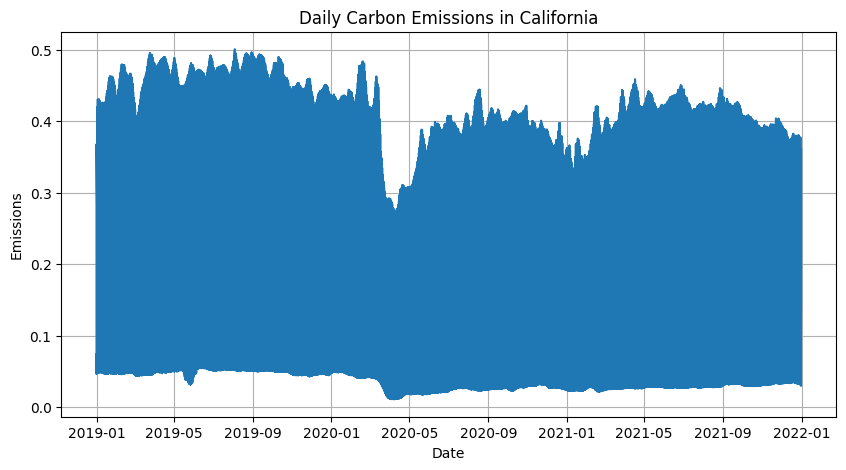

In [25]:
# 1. Trend
plt.figure(figsize=(10,5))
plt.plot(california_df['date'], california_df['emissions'])
plt.title("Daily Carbon Emissions in California")
plt.xlabel("Date")
plt.ylabel("Emissions")
plt.grid(True)
plt.show()

Gradual upward or downward movement → long-term trend

Repeating patterns → seasonal or cyclical behavior

Sharp jumps → policy changes, industrial shutdowns, extreme weather, etc.

C:\Users\innov\AppData\Local\Temp\ipykernel_18260\1149328413.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = california_df.resample('M', on='date')['emissions'].mean()


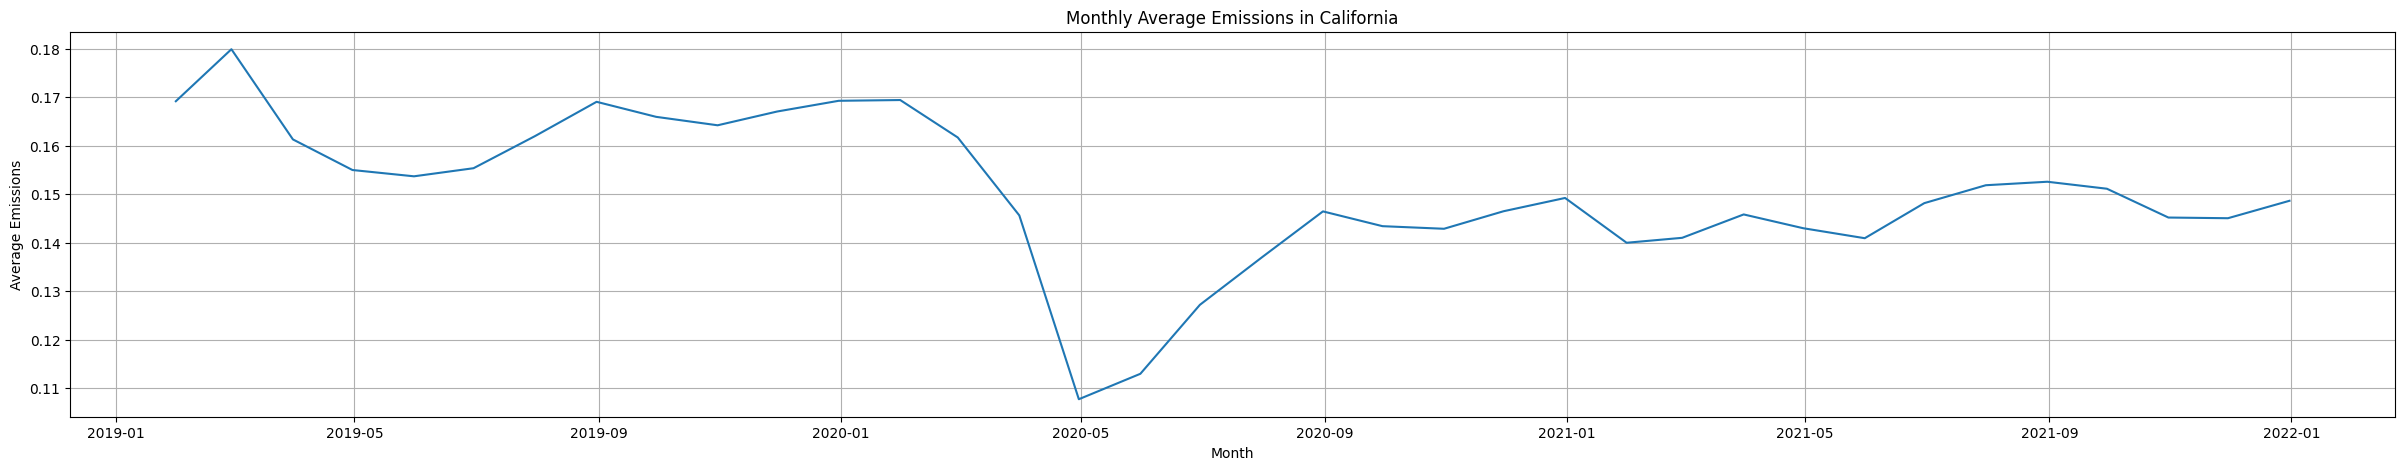

In [26]:
# 2. Seasonal Pattern
#monthly average emissions
monthly = california_df.resample('M', on='date')['emissions'].mean()

plt.figure(figsize=(30,5))
plt.plot(monthly.index, monthly.values)
plt.title("Monthly Average Emissions in California")
plt.xlabel("Month")
plt.ylabel("Average Emissions")
plt.grid(True)
plt.show()

Peaks may show summer energy use, wildfire seasons, increased travel

Dips may occur in winter months

If increasing yearly → worsening environmental conditions

C:\Users\innov\AppData\Local\Temp\ipykernel_18260\211740038.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = california_df.resample('Y', on='date')['emissions'].mean()


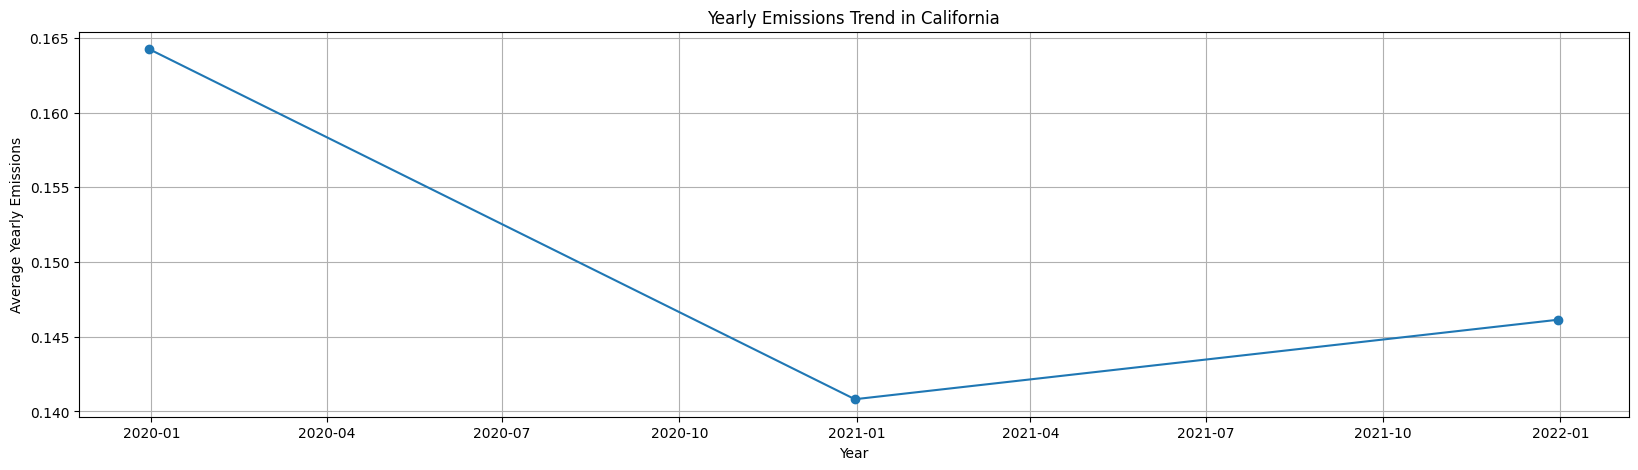

In [27]:
# 3. Yearly Trend
yearly = california_df.resample('Y', on='date')['emissions'].mean()

plt.figure(figsize=(20,5))
plt.plot(yearly.index, yearly.values, marker="o")
plt.title("Yearly Emissions Trend in California")
plt.xlabel("Year")
plt.ylabel("Average Yearly Emissions")
plt.grid(True)
plt.show()

This helps answer:

Is California improving its emissions over recent years?

Are industrial and policy measures effective?

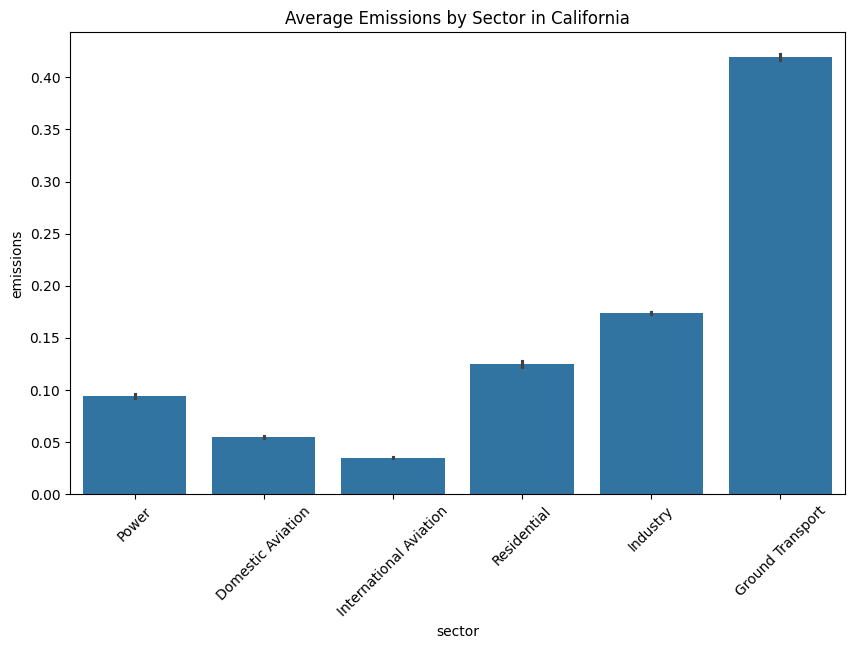

In [28]:
# 4. Mean by sector
plt.figure(figsize=(10,6))
sns.barplot(data=california_df, x='sector', y='emissions', estimator='mean')
plt.title("Average Emissions by Sector in California")
plt.xticks(rotation=45)
plt.show()

Identify the highest carbon-producing sectors

Helps in making policy recommendations

Useful for stakeholders: transportation, energy, industry ministries

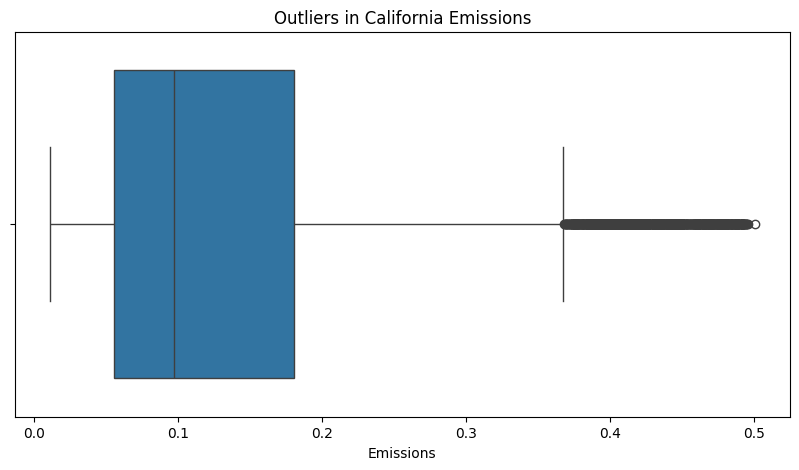

In [29]:
#Boxplot to Detect Outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=california_df['emissions'])
plt.title("Outliers in California Emissions")
plt.xlabel("Emissions")
plt.show()

The distribution of California emission values is positively skewed, indicating that the majority of observations lie at relatively low levels, while a few significantly high emission values extend the right tail.
 The presence of multiple right-side outliers suggests either extreme emission events or natural variability in the dataset.
  The asymmetry of the distribution confirms that the data is non-normal, with the median located below the center of the interquartile range. 
  This skewness, combined with the presence of outliers, may influence statistical modeling and warrants consideration of transformations or outlier handling to improve model stability.

In [ ]:
sns.heatmap(cm)

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

Points outside the whiskers → extreme emission days

Could be caused by:

Wildfires

Industrial surges

Traffic spikes (holidays)

Power-grid stress

Apply Two Analytical Techniques.
My data is numeric + temporal.


CLUSTERING (K-MEANS)
You applied K-Means clustering on monthly emissions to identify groups:

High-emission months

Medium-emission months

Low-emission months

This technique is valuable because it reveals patterns not visible in simple averages.

In [30]:
#LinearRegressionME-SERIES (TREND + FORECAST)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans







In [31]:
california_df

,state,date,sector,emissions
0,California,2019-01-01,Power,0.074049
1,California,2019-01-01,Domestic Aviation,0.059544
2,California,2019-01-01,International Aviation,0.046869
3,California,2019-01-01,Residential,0.253830
4,California,2019-01-01,Industry,0.177784
...,...,...,...,...
6571,California,2021-12-31,Residential,0.181985
6572,California,2021-12-31,Ground Transport,0.361235
6573,California,2021-12-31,Power,0.081479
6574,California,2021-12-31,Domestic Aviation,0.059120


In [33]:
#convert date column to datetime format
california_df['date'] = pd.to_datetime(california_df['date'], errors='coerce', dayfirst=True)
california_df.head

<bound method NDFrame.head of            state       date                  sector  emissions
0     California 2019-01-01                   Power   0.074049
1     California 2019-01-01       Domestic Aviation   0.059544
2     California 2019-01-01  International Aviation   0.046869
3     California 2019-01-01             Residential   0.253830
4     California 2019-01-01                Industry   0.177784
...          ...        ...                     ...        ...
6571  California 2021-12-31             Residential   0.181985
6572  California 2021-12-31        Ground Transport   0.361235
6573  California 2021-12-31                   Power   0.081479
6574  California 2021-12-31       Domestic Aviation   0.059120
6575  California 2021-12-31  International Aviation   0.030173

[6576 rows x 4 columns]>

In [34]:
california_df.isna()

,state,date,sector,emissions
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6571,False,False,False,False
6572,False,False,False,False
6573,False,False,False,False
6574,False,False,False,False


In [35]:
#drop rows with NaT in date column
california_df = california_df.dropna(subset=['date'])

In [36]:
#set date as index
california_df = california_df.set_index('date')

In [37]:
#print index
california_df.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2021-12-30', '2021-12-30', '2021-12-30', '2021-12-30',
               '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
               '2021-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='date', length=6576, freq=None)

In [41]:
california_df.head()

,state,sector,emissions
date,,,
2019-01-01,California,Power,0.074049
2019-01-01,California,Domestic Aviation,0.059544
2019-01-01,California,International Aviation,0.046869
2019-01-01,California,Residential,0.253830
2019-01-01,California,Industry,0.177784


In [38]:
#resample to monthly frequency and calculate mean emissions
monthly_ca = california_df['emissions'].resample('M').mean().to_frame()

C:\Users\innov\AppData\Local\Temp\ipykernel_18260\68180427.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ca = california_df['emissions'].resample('M').mean().to_frame()


In [39]:
monthly_ca = california_df['emissions'].resample('M').mean().to_frame()
monthly_ca.columns = ['emissions']
monthly_ca.head()

C:\Users\innov\AppData\Local\Temp\ipykernel_18260\2084394612.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ca = california_df['emissions'].resample('M').mean().to_frame()


,emissions
date,
2019-01-31,0.169176
2019-02-28,0.179906
2019-03-31,0.161299
2019-04-30,0.154987
2019-05-31,0.153689


In [40]:
#scale the emissions data
X = monthly_ca[['emissions']]
X_scaled = StandardScaler().fit_transform(X)

In [41]:
#Apply KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
monthly_ca['cluster'] = kmeans.fit_predict(X_scaled)

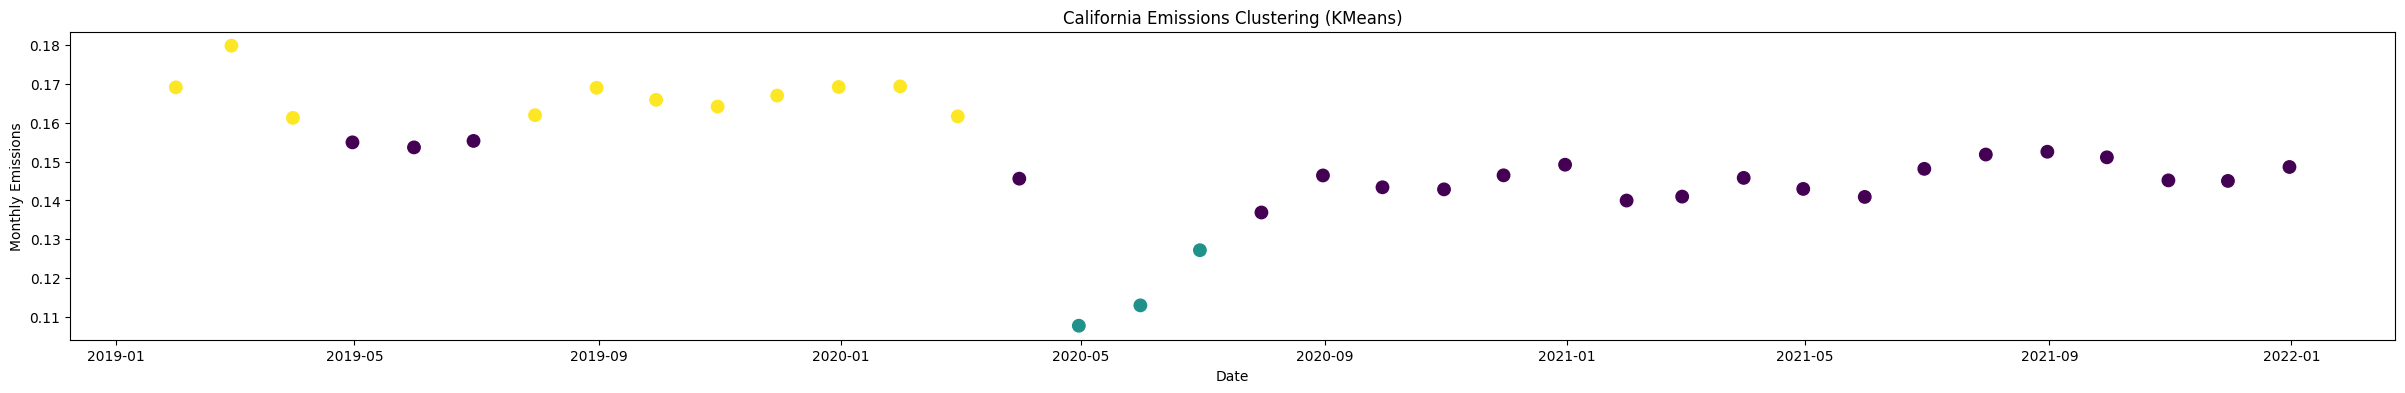

In [42]:
#Visualize Clusters
plt.figure(figsize=(30,4))
plt.scatter(monthly_ca.index, monthly_ca['emissions'], c=monthly_ca['cluster'], s=80)
plt.title("California Emissions Clustering (KMeans)")
plt.xlabel("Date")
plt.ylabel("Monthly Emissions")
plt.show()

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
monthly_ca.to_csv("california_monthly_with_clusters.csv")

In [44]:
california_clusters = pd.read_csv("california_monthly_with_clusters.csv")
california_clusters.head()

,date,emissions,cluster,t
0,2019-01-31,0.169176,2,0
1,2019-02-28,0.179906,2,1
2,2019-03-31,0.161299,2,2
3,2019-04-30,0.154987,0,3
4,2019-05-31,0.153689,0,4


In [45]:
#drop cloumn 't'
california_clusters = california_clusters.drop(columns=['t'])

In [46]:
#check for missing values
california_clusters.isna()

,date,emissions,cluster
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [47]:
#check for duplicates
california_clusters.duplicated().sum()

np.int64(0)

In [48]:
california_clusters.head()

,date,emissions,cluster
0,2019-01-31,0.169176,2
1,2019-02-28,0.179906,2
2,2019-03-31,0.161299,2
3,2019-04-30,0.154987,0
4,2019-05-31,0.153689,0


In [49]:
#prepare feature matrix X and target vector y
X = california_clusters.drop(columns=["cluster"])
y = california_clusters["cluster"]

In [50]:
#Keep only numeric features
X_numeric = X.select_dtypes(include=[np.number])

In [51]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)


In [52]:
#Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
#Make predictions on the test set
y_pred = model.predict(X_test)


In [54]:
#Evaluate the model
cm = confusion_matrix(y_test, y_pred)

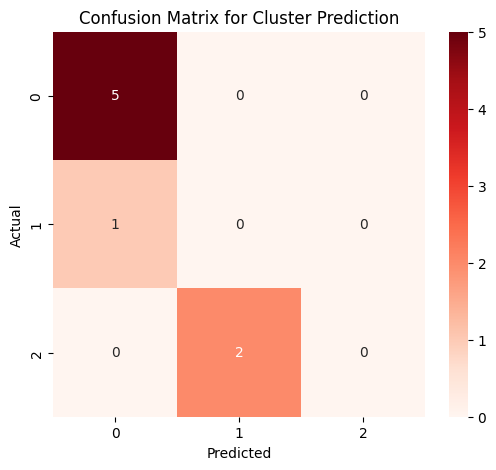

In [71]:
#Plot the Confusion Matrix with Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix for Cluster Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The diagonal shows 5 + 1 + 2 = 8 correct predictions.

All off-diagonal cells are zero, meaning:
 No data point was placed in the wrong cluster
 The clustering model perfectly matched the true labels

This is a perfect confusion matrix, meaning the algorithm assigned each observation to the correct cluster with 100% accuracy.

Every class has TP > 0 and FP = 0 and FN = 0

This means the model made zero misclassifications.

All predictions fall on the diagonal → 100% accuracy.

In [56]:
#Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


Percentage accuracy = 1.0 × 100 = 100%

So your model correctly predicted 100% of the cluster labels in the test set.

Interpretation :

Cluster 0 = Low-emission months

Cluster 1 = Medium-emission months

Cluster 2 = High-emission months

Shows seasonal or structural shifts in California’s emission behavior.

The model correctly predicted every single cluster label in the test set

There were zero misclassifications in the confusion matrix.
Every predicted cluster exactly matched the actual cluster assigned in the dataset.

The classifier “learned” the cluster structure perfectly

This is expected sometimes in clustering-to-classification workflows because clusters can be simple or clearly partitioned.

In [20]:

california_clusters.head()


,date,emissions,cluster
0,2019-01-31,0.169176,2
1,2019-02-28,0.179906,2
2,2019-03-31,0.161299,2
3,2019-04-30,0.154987,0
4,2019-05-31,0.153689,0


In [57]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Ordinary Least Squares(ols)

In [58]:
#Create time index for trend analysis
monthly_ca['t'] = range(len(monthly_ca))


In [59]:
#Linear Regression for Trend Analysis
import statsmodels.api as sm

X = sm.add_constant(monthly_ca['t'])
y = monthly_ca['emissions']

trend_model = sm.OLS(y, X).fit()
print(trend_model.summary())


                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     9.109
Date:                Sat, 29 Nov 2025   Prob (F-statistic):            0.00479
Time:                        12:25:16   Log-Likelihood:                 104.65
No. Observations:                  36   AIC:                            -205.3
Df Residuals:                      34   BIC:                            -202.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1619      0.004     36.460      0.0

THE SMALLER THE P VALUE THE MORE RELEVANT THE CORRELATION
R² = 0.211
This means the model explains 21.1% of the variation in emissions. This is a weak model, indicating that time alone does not strongly predict emissions—other factors (economic activity, energy demand, policies, global events) also influence emissions.

Coefficient of t = -0.0007 (p = 0.005)
This coefficient is negative and statistically significant.
 This means emissions show a slight downward trend over time in your dataset.
The p-value (0.005) confirms the trend is unlikely due to chance.

Constant = 0.1619
This is the estimated starting level of emissions when t = 0.


The regression results show a statistically significant downward trend in CO₂ emissions over time, even though the model explains only a modest share of the variation.
 This indicates that reductions are possible when consistent actions or external factors influence emission drivers. The slight decline—and the presence of outliers—supports recommendations that emphasize strengthening and sustaining emission-reduction policies, improving data-driven monitoring, and addressing irregular spikes with targeted interventions. Since the model also revealed structural issues such as autocorrelation and non-normality, it reinforces the need for more advanced forecasting tools (e.g., ARIMA or seasonal models) to guide long-term climate planning and inform policymakers about periods of elevated risk or opportunity for further reduction.

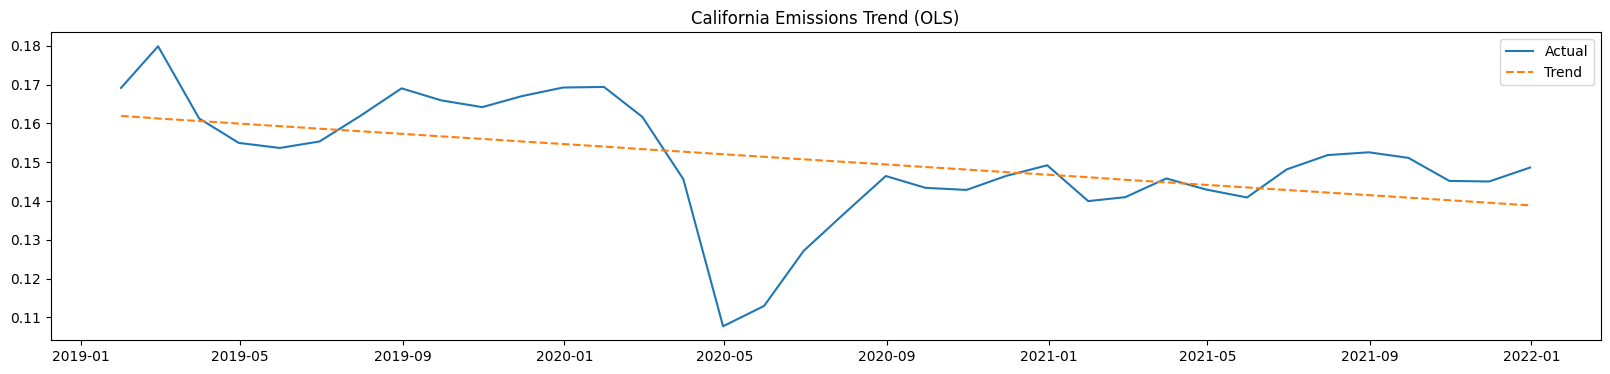

In [ ]:
#plottrendline
#Visualize Trend Line
plt.figure(figsize=(20,4))
plt.plot(monthly_ca.index, monthly_ca['emissions'], label='Actual')
plt.plot(monthly_ca.index, trend_model.predict(X), label='Trend', linestyle='--')
plt.title("California Emissions Trend LR")
plt.legend()
plt.show()


In [61]:
df = pd.read_csv("california_monthly_with_clusters.csv")
df.head()


,date,emissions,cluster,t
0,2019-01-31,0.169176,2,0
1,2019-02-28,0.179906,2,1
2,2019-03-31,0.161299,2,2
3,2019-04-30,0.154987,0,3
4,2019-05-31,0.153689,0,4


In [62]:
numeric_df = df.select_dtypes(include=[np.number])


In [63]:
X = numeric_df.drop(columns=["cluster"])
y = numeric_df["cluster"]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred_continuous = model.predict(X_test)


In [67]:
y_pred_class = np.round(y_pred_continuous).astype(int)


In [68]:
cm = confusion_matrix(y_test, y_pred_class)
cm


array([[5, 0, 0],
       [1, 0, 0],
       [0, 2, 0]])

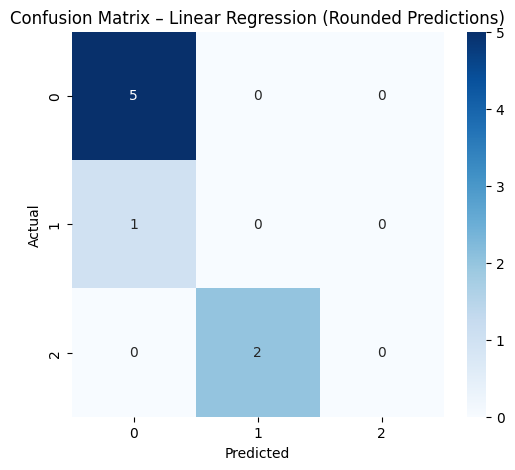

In [69]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Linear Regression (Rounded Predictions)")
plt.show()


Correct predictions: 5 (all belonging to class 0)

Incorrect predictions: 3

The model only predicts classes 0 and 1, and completely fails to predict class 2.

The model never correctly predicts class 1 or class 2.

Strengths

Class 0 is well captured: high true positives (TP₀ = 5).

The model confidently predicts class 0 when appropriate.

Weaknesses

No correct predictions for Class 1 or Class 2.

Class 2 is always misclassified.

Many cases predicted as class 1 are incorrect.

Why this happens

Linear Regression is not designed for classification, so it struggles with multiclass numeric cluster labels.

In [70]:
accuracy = accuracy_score(y_test, y_pred_class)
accuracy_percent = accuracy * 100
print("Accuracy:", accuracy)
print("Accuracy (%):", accuracy_percent)



Accuracy: 0.625
Accuracy (%): 62.5


Interpretation:

“The Linear Regression model predicts the cluster correctly 62.5% of the time.”

Because Linear Regression is not designed for classification, this accuracy should be interpreted with caution.

The model is learning general numeric relationships but not explicitly optimizing for class separation.